# Text vectors as encoding expected values

I have spent some time thinking about how the vector encoding operates. The work below suggests that the text vectors are encoding the expected values of the high-dimensional hashes that it assembles from the text. I have recreated the text vector by normalizing it by the number of elements it has summed. Then I can dot this with a unit-length text vector to get the actual expected value of the text element. 

I then compare the results of the text vector computations with the actual occurrence of the text. It is clear that there is a significant connection, and that the text vector is effectively encoding the expected value. This all makes sense when you think about what is happening. 



In [1]:

import random_idx
import utils
import pickle

from pylab import *

%matplotlib inline


height has been deprecated.

2016-01-29 10:17


In [2]:
fread = open("alice_RI_letters", "r")
fread1 = open("alice_lang_vectors", "r")
RI_letters = pickle.load(fread)
lang_vectors = pickle.load(fread1)
fread.close()
fread1.close()

N=RI_letters.shape[1]

text_name="preprocessed_texts/AliceInWonderland.txt"

text = utils.load_text(text_name)

# generate text vector from alice based on each character
# this function creates a normalized text vector
alice_text_vector1 = random_idx.generate_text_vector(N, RI_letters, 1, text_name)

#%%
# generate text vector based on each pair of characters
alice_text_vector2 = random_idx.generate_text_vector(N, RI_letters, 2, text_name)

In [3]:
# This is now a normalized vector operation, which means the probability
# should be encoded, and that the sum over all letters should be 1
letter_vals = np.dot(RI_letters/N, alice_text_vector1.T)

print sum(letter_vals)


1.00287097096


In [4]:

# So, this is really just encoding the expected value of each letter based on 
# the given text. This means that letter_vals should be very close to the counts
# of the letters found in the text

letter_counts = np.zeros(len(random_idx.alphabet))

for i,letter in enumerate(random_idx.alphabet):
    letter_counts[i] = text.count(letter)

letter_prob = letter_counts / sum(letter_counts)


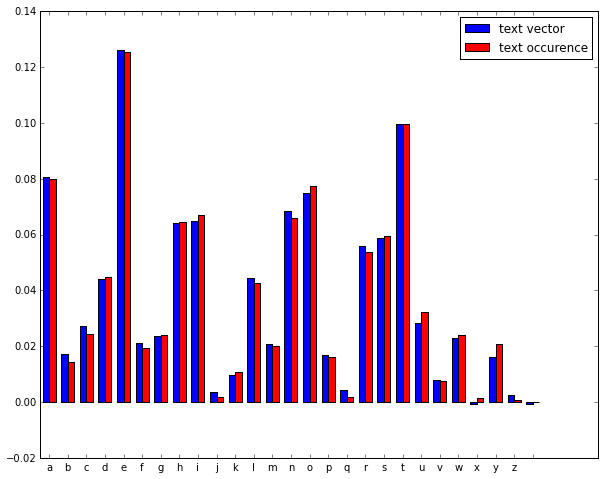

In [6]:
figure(figsize=(10,8))

bar(arange(len(letter_vals))+0.15, letter_vals, width=0.35, color='b', label='text vector')
bar(arange(len(letter_vals))+0.5, letter_prob, width=0.35, color='r', label='text occurence')

ax = gca()

ax.set_xticks(arange(len(letter_vals))+0.5)
th = ax.set_xticklabels(list(random_idx.alphabet))

legend()


## 2-letter based text vectors, do not contain information about individual characters

If we look for individual letters in alice_text_vector2, then they will have low counts, because we only stored expected counts of letter pairs. Each letter pair has its own unique hash, and this is different than the individual letter. In a text vector made up of only letter pairs, the individual hashes will never show up. This means that the lookup of individual letters will all have very small values near 0 -- i.e. the text never contained indivual letters


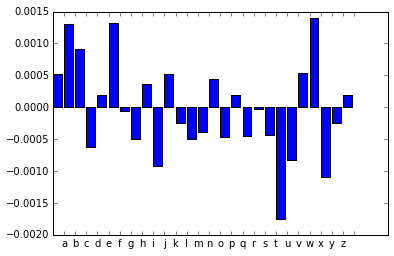

In [7]:
letter_vals12 = np.dot(RI_letters/N, alice_text_vector2.T)

figure;
bar(arange(len(letter_vals12)), letter_vals12)

ax = gca()

ax.set_xticks(arange(len(letter_vals))+1)
th = ax.set_xticklabels(list(random_idx.alphabet))



So, now if we go through every pair of letters we can get the probabilities

In [8]:
letter_vals2 = np.zeros(len(random_idx.alphabet)**2)
letter_counts2 = np.zeros(len(random_idx.alphabet)**2)
letter_pairs = []
c = 0

for i, letter1 in enumerate(random_idx.alphabet):
    for j, letter2 in enumerate(random_idx.alphabet):
        
        letter_pairs.append(letter1+letter2)
        
        letter_counts2[c] = text.count(letter_pairs[c])
        
        vector = np.roll(RI_letters[i,:], 1) * RI_letters[j,:]
        
        letter_vals2[c] = np.dot(vector/N, alice_text_vector2.T)
        c+=1

#%%
letter_prob2 = letter_counts2 / sum(letter_counts2)

# this should be close to 1
print sum(letter_vals2)

0.982935469997


In the plot, I am just going to take some of the more significant pairs and not plot all 27\*27 pairs of letters.

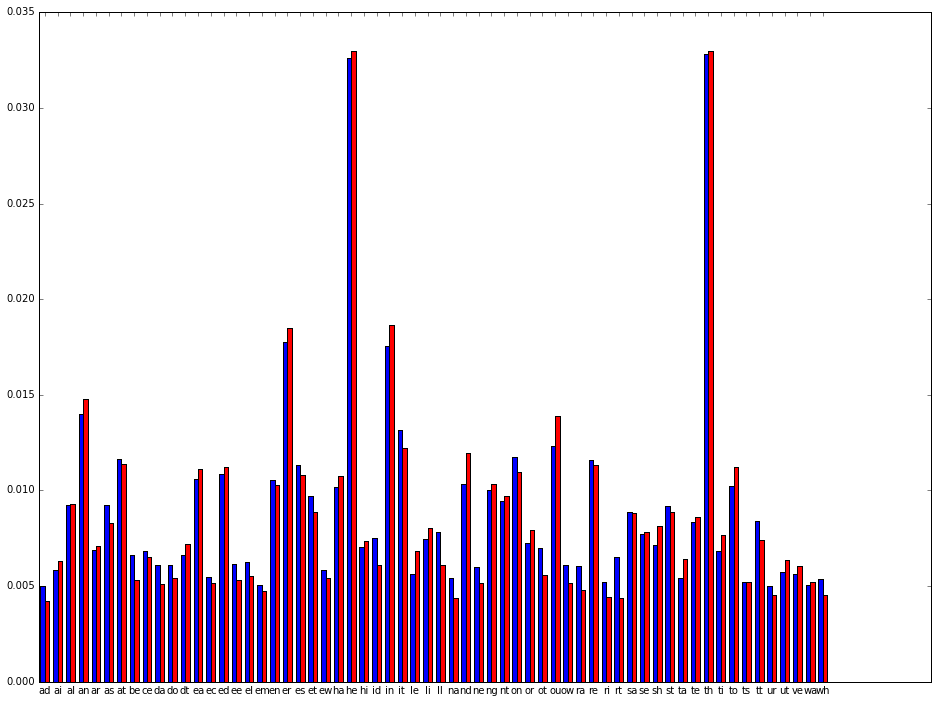

In [9]:
#%%
figure(figsize=(16,12))

sig_idx = find(letter_vals2 > 0.005)

b1=bar(arange(len(letter_vals2[sig_idx]))+0.15, letter_vals2[sig_idx], width=0.35, color='b')
b2=bar(arange(len(letter_prob2[sig_idx]))+0.5, letter_prob2[sig_idx], width=0.35, color='r')

ax = gca()

ax.set_xticks(arange(len(letter_vals2[sig_idx]))+0.5)

pair_labels = []
for i in sig_idx:
    pair_labels.append(letter_pairs[i])
    
t1 = ax.set_xticklabels(pair_labels)

In [10]:
sort_idx = argsort(letter_vals2)

for i in range(20):
    print letter_pairs[sort_idx[-1-i]], 

th he er in an it ou on at re es ed ea en nd to ha ng et nt
